In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data,info=tfds.load('fashion_mnist',split='train',with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.2PRJNT_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.2PRJNT_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpbnbqkttytfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

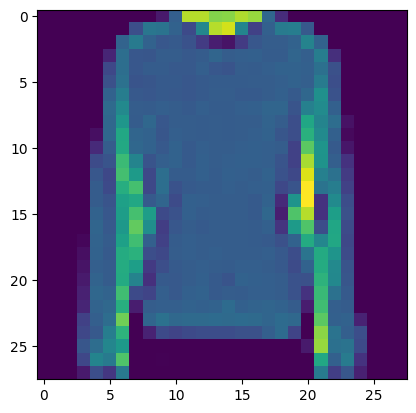

Label: 2


In [ ]:
for example in data.take(1):
    image, label = example['image'], example['label']
    plt.imshow(image.numpy()[:, :, 0])
    plt.show()
    print(f"Label: {label}")


In [ ]:
df=tfds.as_dataframe(data.take(10),info)

In [ ]:
df

,image,label
0,,2 (Pullover)
1,,1 (Trouser)
2,,8 (Bag)
3,,4 (Coat)
4,,1 (Trouser)
5,,9 (Ankle boot)
6,,2 (Pullover)
7,,2 (Pullover)
8,,0 (T-shirt/top)
9,,2 (Pullover)


In [ ]:
def preprocess(data):
  img=data['image']
  label=data['label']
  img=tf.cast(img,tf.float32)/255.0
  return img,label

In [ ]:
prep_data=data.map(preprocess)

In [ ]:
#the class names in fashion dataset
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


28


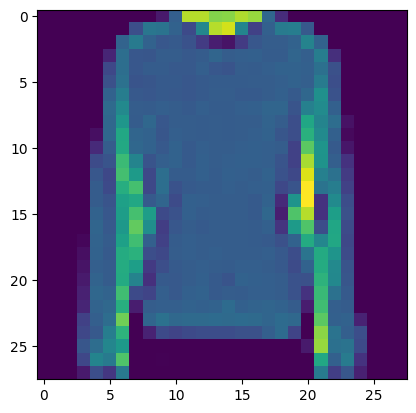

Pullover


In [ ]:
for i in prep_data.as_numpy_iterator():
  print(len(i[0][::,::,0]))
  plt.imshow(i[0][::,::,0])
  plt.show()
  print(class_names[i[1]])
  break


In [ ]:
df=list(prep_data.as_numpy_iterator())

In [ ]:
df

In [ ]:
X=np.array([i[0] for i in df])
y=np.array([i[1] for i in df])

array([2, 1, 8, ..., 6, 9, 9])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train.reshape(X_train.shape[0],-1),y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test.reshape(X_test.shape[0],-1))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85575